# Netflix Movies and TV Show Analysis

- Helen Ruth Yemima
- 49200234 - Kwik Kian Gie School of Business
- Dimulai tanggal 11 November 2020
- Sumber dataset: https://www.kaggle.com/shivamb/netflix-shows

In [16]:
# import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Dataset

In [17]:
df = pd.read_csv("netflix_shows.csv")
print('%s rows x %s columns' % (df.shape[0], df.shape[1]))

df.head()

6234 rows x 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Data yang digunakan adalah data Movie dan TV Show yang ada di Netflix

## Data Cleaning

### Mengatur kolom

In [18]:
# membuang kolom yang tidak diperlukan
df = df.drop(['show_id', 'description'], axis = 1)

In [19]:
# rename kolom
df = df.rename(columns = {'listed_in': 'genre', 'date_added': 'month_added'})

In [20]:
# menghapus keterangan tanggal dan tahun penambahan
for x in range(1800, 2021):
    df['month_added'] = df['month_added'].str.replace('%s' % x, '')
for i in range(1, 32):
    df['month_added'] = df['month_added'].str.replace('%s' % i, '')
df['month_added'] = df['month_added'].str.replace('0', '')
df['month_added'] = df['month_added'].str.replace(' ', '')
df['month_added'] = df['month_added'].str.replace(',', '')

# mengganti 'UR' menjadi 'NR' di kolom rating
df['rating'] = df['rating'].str.replace('UR', 'NR')

### Mengatasi missing values

In [21]:
# daftar jumlah missing values
mv = df.isnull().sum().sort_values(ascending = False)
# jangan tampilkan kolom yang tidak memiliki missing value
mv = mv[mv != 0].dropna()

mv

director       1969
cast            570
country         476
month_added      11
rating           10
dtype: int64

- Terlihat ada 5 kolom yang memiliki missing values
- Kolom dengan missing values paling banyak adalah director
- Kolom dengan missing values paling sedikit adalah rating dan month_added

In [22]:
# menghapus baris dan kolom yang memiliki missing value lebih dari 30% dari jumlah data
# kolom
mvRatio = df.isnull().sum() / len(df)
df = df.drop(mvRatio[mvRatio > 0.3].index, axis = 1)
# baris
mvRatio = df.isnull().sum(1) / len(df.columns)
df = df.drop(mvRatio[mvRatio > 0.3].index, axis = 0)

Kolom yang memiliki missing values lebih dari 30% dari jumlah data akan dihapus supaya tidak mengotori data

In [23]:
# menghapus missing values di kolom month_added
df = df.dropna(subset=['month_added'])

Baris yang memiliki missing values di kolom month_added akan dihapus supaya tidak mengotori data

In [24]:
# mengganti missing values di kolom rating menjadi 'NR'
df['rating'] = df['rating'].replace(np.nan, 'NR', regex=True)

# mengganti  missing values di kolom cast dan country menjadi 'unknown'
df['country'] = df['country'].replace(np.nan, 'unknown', regex=True)
df['cast'] = df['cast'].replace(np.nan, 'unknown', regex=True)

In [25]:
# mengecek apakah masih ada missing value
df.isnull().values.any()

False

In [26]:
df.head()

,type,title,cast,country,month_added,release_year,rating,duration,genre
0,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",September,2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,September,2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,September,2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,September,2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,September,2017,TV-14,99 min,Comedies


## Statistics

### Perbandingan persentase Movie dan TV Show

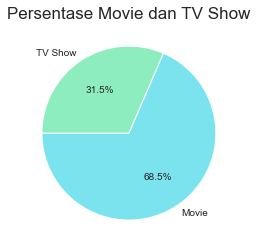

In [27]:
type = df['type'].value_counts()
plt.pie(type, labels = type.index, autopct="%.1f%%", colors = ['#7be3ed', '#8eedbe'], startangle = 180)
plt.title('Persentase Movie dan TV Show', fontsize = 17)
plt.show()

- Bisa dilihat bahwa jumlah Movie lebih banyak daripada TV Show
- Rasio Movie dan TV Show jika dibulatkan adalah 1 : 2

### Perbandingan Jumlah 

#### Country

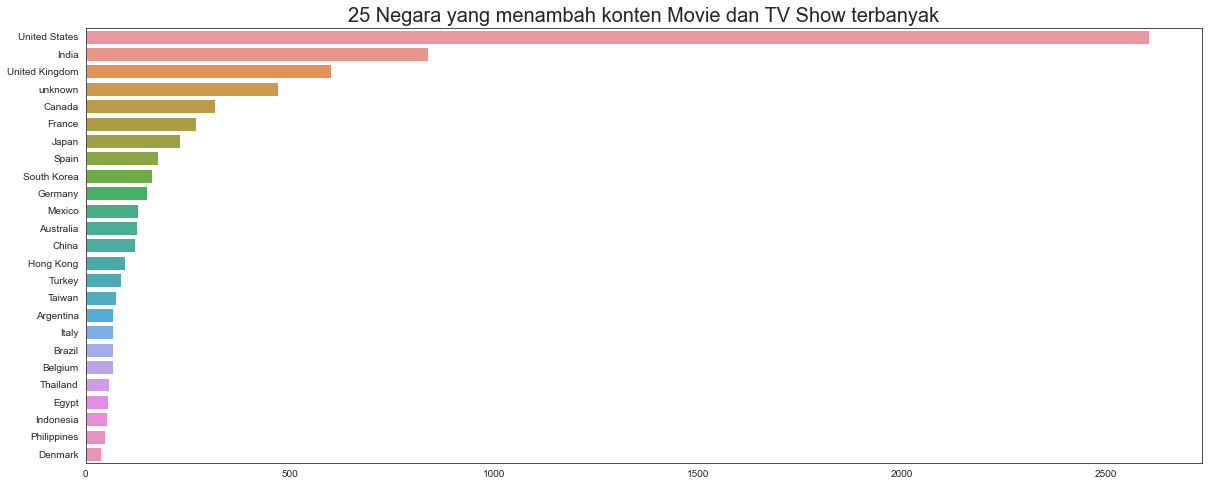

In [28]:
country = pd.Series(dict(Counter(','.join(df['country']).replace(', ',',').split(',')))).sort_values(ascending = False)[:25]

plt.figure(figsize = (20, 8))
plt.title('25 Negara yang menambah konten Movie dan TV Show terbanyak', fontsize = 20)
sns.set_style("white")
sns.barplot(y = list(country.index), x = list(country.values))

plt.show()

Dapat dilihat negara yang paling banyak menambah konten di Netflix negara mereka adalah United States, diikuti oleh India dan United Kingdom

#### Rating

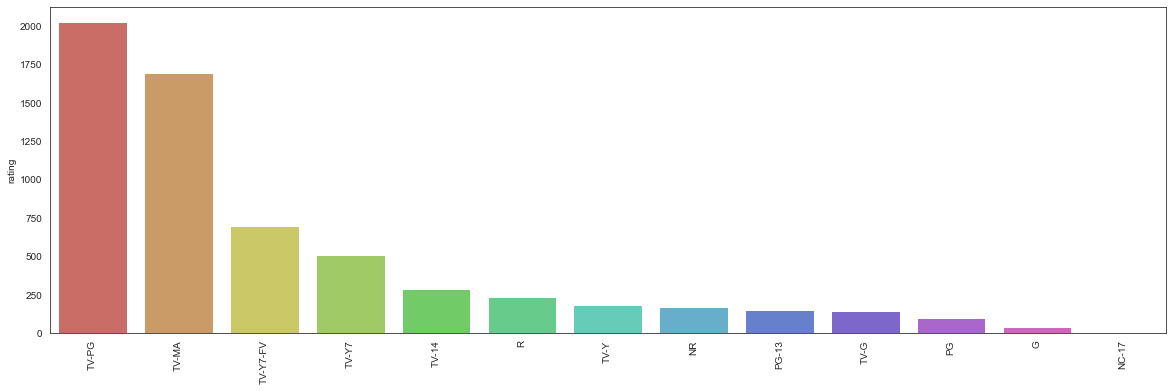

In [29]:
labelRating = df['rating'].unique()
jumlahRating = df['rating'].value_counts()

plt.figure(figsize = (20, 6))
sns.set_style("white")
ax = sns.barplot(x = labelRating, y = jumlahRating, palette = "hls")
ax.set_xticklabels(labelRating, rotation = '90')

plt.show()

- Rating dengan jumlah paling banyak adalah TV-PG dan TV-MA, menunjukkan bahwa banyak Movie dan TV Show yang ditujukan untuk remaja dan orang dewasa
- Rating dengan jumlah paling sedikit adalah NC-17 dan G, menunjukkan bahwa hanya sedikit Movie dan TV Show yang ditujukan untuk semua umur

#### Month Added

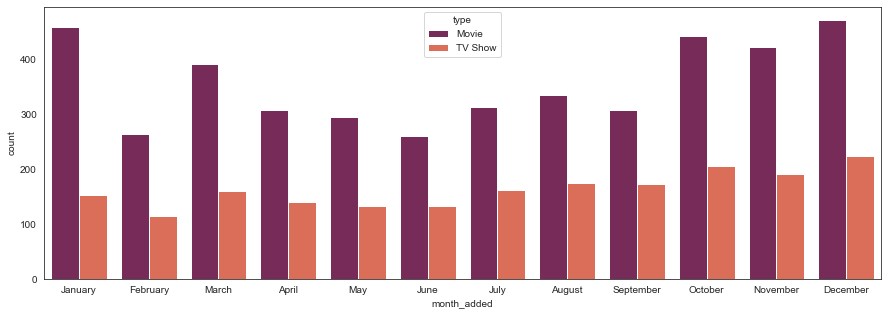

In [30]:
# mengurutkan bulan
monthOrder = pd.Categorical(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered = True)

plt.figure(figsize = (15, 5))
sns.set_style("white")
sns.countplot(x = 'month_added', data = df, hue = "type", order = monthOrder, palette = "rocket")

plt.show()

- Netflix paling sering menambahkan Movie pada bulan Desember, Januari, dan Oktober
- Netflix paling sering menambahkan TV Show pada bulan Desember, Oktober, dan November

### Rata-rata Durasi

In [31]:
# menghapus keterangan waktu
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = df['duration'].str.replace(' Season', '')
df['duration'] = df['duration'].str.replace('s', '')

# mengubah tipe data menjadi integer
df['duration'] = pd.to_numeric(df['duration'])

In [32]:
# rata-rata duration
df.groupby('type')['duration'].mean().round()

type
Movie      99.0
TV Show     2.0
Name: duration, dtype: float64

- Rata-rata durasi untuk Movie adlah 99 menit
- Rata-rata durasi untuk TV Show adalah 2 seasons

## Insights

- Jumlah Movie lebih banyak daripada TV Show di Netflix
- Negara dengan jumlah Movie dan TV Show terbanyak di Netflix adalah United States
- Waktu penambahan Movie dan TV Show ke Netflix paling sering pada bulan Desember dan Oktober
- Rata-rata durasi untuk Movie adalah 99 menit dan untuk TV Show adalah 2 seasons